# Access Divisors and Models

We start with some basic, universal loading and setup.
This is the same in all how-tos and tutorials, so that there is a unified set of data to work with.


> **Note**
>
> Download the example file here: [HP3_TE300_SPC630.hdf5](https://zenodo.org/record/5902313/files/HP3_TE300_SPC630.hdf5)

First, let's run the following code to generate a basic analysis for us to begin working with.
This code is essentiall the same as that found in the [tutorial](#Tutorial).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import fretbursts as frb
import burstH2MM as bhm

filename = 'HP3_TE300_SPC630.hdf5'
# load the data into the data object frbdata
frbdata = frb.loader.photon_hdf5(filename)
# if the alternation period is correct, apply data
# plot the alternation histogram
# frb.bpl.plot_alternation_hist(frbdata) # commented so not displayed in notebook
frb.loader.alex_apply_period(frbdata)
# calcualte the background rate
frbdata.calc_bg(frb.bg.exp_fit, F_bg=1.7)
# plot bg parameters, to verify quality
# frb.dplot(frbdata, frb.hist_bg) # commented so not displayed in notebook
# now perform burst search
frbdata.burst_search(m=10, F=6)
# make sure to set the appropriate thresholds of ALL size
# parameters to the particulars of your experiment
frbdata_sel = frbdata.select_bursts(frb.select_bursts.size, th1=50)
bdata = bhm.BurstData(frbdata_sel)

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------
# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction

<a id='adivmod'></a>
## Access within objects

In burstH2MM, whenever a new optimization result (`H2MM_result`) or divisor scheme (`H2MM_list`) is created, it is stored in a specific variable inside the creating object. 
Therefore, you can access such a result or divisor scheme through its parent. 
This also helps you keep track of which result belongs with which data set.

So, when we ran the optimization from the [tutorial](#tutops):

In [2]:
bdata.models.calc_models()

The model converged after 1 iterations

The model converged after 36 iterations

The model converged after 128 iterations

The model converged after 408 iterations

2

We were actually creating several `H2MM_result` objects. 
These can be referenced directly as indexes of the `H2MM_list` object

In [3]:
amodel = bdata.models[0]
type(amodel)

burstH2MM.BurstSort.H2MM_result

From these `H2MM_result` objects, we have access to the whole set of model- and dwell-based parameters of that particular optimization.

> **Note**
> 
> Referencing an index under a `H2MM_result` object is identical to referencing an index of the attribute `H2MM_list.opts`
> `H2MM_list.opts` stores all the results in a list, and `H2MM_list` automatically treates indexing itself as indexing the list.

In [4]:
bdata.models[0] is bdata.models.opts[0]

True

When you run `BurstData.auto_div()` or `BurstData.new_div()`, a similar behavior occurs, where a new `H2MM_result` object is created, and placed inside the `BurstData.div_models` dictionary. 
So, looking at those results, you can access them by the key that was handed back.

> Note that we use the name returned.

In [5]:
name = bdata.auto_div(2)
type(bdata.div_models[name])

burstH2MM.BurstSort.H2MM_list

Now, it can be annoying to constantly have to save the name of each new divisor, so burstH2MM offers an alternative: you can specify the name yourself before creating the divisor.

In [6]:
bdata.auto_div(2, name="mydivisor")
type(bdata.div_models["mydivisor"])

burstH2MM.BurstSort.H2MM_list

This can be useful if you have particular reasons for creating a certain divisor.

## Examples of Object Refrencing and Creation

There are different ways to select/refer to the same objects. 
So, let’s see different examples of alternative ways to perform the same fundamental calculations.

Now, let’s see the code as it was before in the [tutorial](#Tutorial):

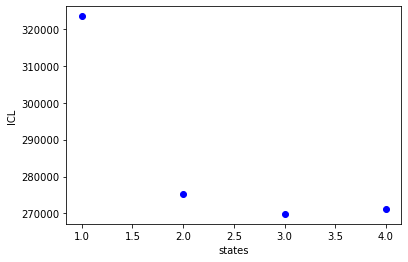

In [7]:
# calculate models
bdata.models.calc_models()
bhm.ICL_plot(bdata.models)

Which we can re-write as:

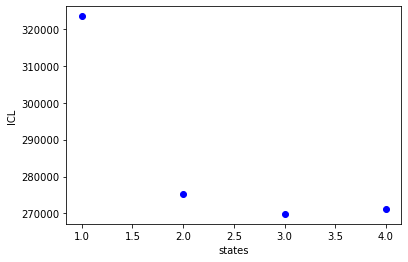

In [8]:
models_list = bdata.models
models_list.calc_models()
bhm.ICL_plot(models_list)

Finally, since these models are all connected, we can even swap the last lines like this:

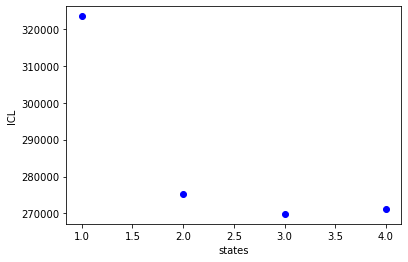

In [9]:
models_list = bdata.models
models_list.calc_models()
# models_list refers to the same thing as bdata.models
bhm.ICL_plot(bdata.models)

Now let’s look at this pattern with divisors, first we’ll initiate this code, and pull out the variables

In [10]:
bdata.auto_div(1, name="one_div")
# extract the H2MM_list divisor model into its own variable
div_list = bdata.div_models["one_div"]

So this:

In [11]:
bdata.div_models["one_div"].calc_models()

The model converged after 1 iterations

The model converged after 28 iterations

The model converged after 86 iterations

The model converged after 397 iterations

2

is the same as this:

In [12]:
div_list.calc_models()

2

That's the end of this How-To, thank you for using burstH2MM.